## Name: Hafidah Dwi Cahyani
## Number of Students: PYTN-KS14-003
## Assignment: 1

## Isi Data Set:
- `lsoa_code`: berisi area kepolisian
- `borough`: wilayah di London yang berhubungan dengan statistik
- `major_category`: kategori kejahatan berat
- `minor_category`: kategori kejahatan ringan
- `value`: jumlah kejahatan pada wilayah tertentu di London
- `year`: ringkasan pada statistik tahunan
- `month`: ringkasan pada statistik bulan

In [55]:
# memasukkan import library yang akan digunakan
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import seaborn as sea

%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium

In [56]:
# memasukkan data pada csv 
df_london = pd.read_csv('london_crime_by_lsoa.csv')

In [57]:
# menampilkan 10 data teratas
df_london.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [58]:
# menampilkan 10 data terbawah
df_london.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


## Isi Tipe Data
---

In [59]:
# digunakan untuk melihat dimensi data (ukuran baris dan kolom)
df_london.shape

(13490604, 7)

* Kesimpulan:
  
  Terlihat bahwa ada 7 kolom yang menampilkan sebanyak 13490604

In [60]:
# digunakan untuk menunjukkan list pada header
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

### Ringkasan pada kolom
---

In [61]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### Data Cleaning
---

In [62]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Kesimpulan:
1. Kolom lsoa_code, borough, major_category, minor_category merupakan tipe data string
2. Kolom value, year, dan month merupakan tipe data interger


In [63]:
# mengecek data yang kosong
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [64]:
df_london.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

Kesimpulan:

* Tidak ada data yang kosong

In [65]:
df_london.isna()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


#### Hasil pengecekan
- Tidak terdapat nilai kosong dari kolom yang ada


In [66]:
# mengecek duplikasi data
df_london.duplicated().sum()

0

#### Kesimpulan:
- Tidak terdapat data yang terduplikasi

In [67]:
# mengambil data yang tidak sama dengan nol
df_london = df_london[df_london.value != 0]
# menampilkan dimensi datanta
df_london.shape

(3419099, 7)

# Analysis Data

## Area Plot
---

### Bagaimanakah kecenderungan perkembangan 3 wilayah yang memiliki tingkat kejahatan tertinggi dari 2008-2016?

In [68]:
# mengahpus kolom yang tidak diperlukan
data = ["major_category","minor_category","month"]
top_crime = df_london.drop(data,axis=1)
# membuat set kolom pada index
top_crime = top_crime.set_index("year").groupby("borough").sum()
top_crime = top_crime.sort_values(by="value", ascending=False).head()
# menampilkan 
top_crime

C:\Users\udins\AppData\Local\Temp\ipykernel_24388\3525262280.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_crime = top_crime.set_index("year").groupby("borough").sum()


,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [69]:
# membersihkan data yang tidak dibutuhkan dan membuat set kolom index
data_topcrm = df_london.drop(data, axis=1).set_index("borough")

data_topcrm = data_topcrm.loc[top_crime.index]
data_topcrm = pd.pivot_table(data_topcrm, values="value", 
                         aggfunc=np.sum, index="year", 
                         columns="borough")
# menampilkan 
data_topcrm

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


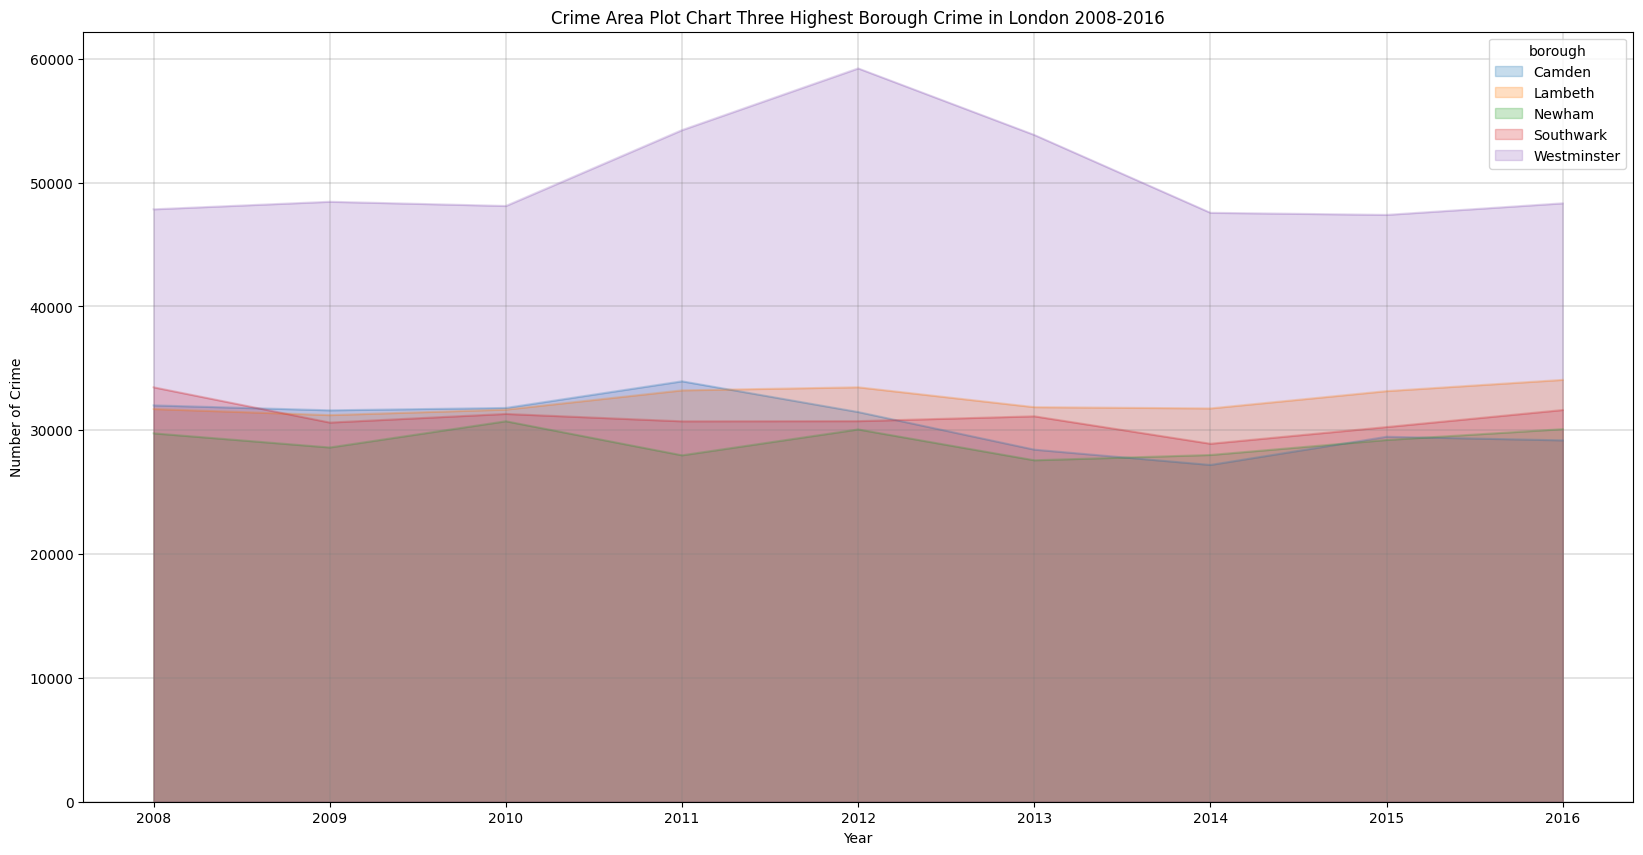

In [70]:
# membuat grafik jumlah kejahatan tertinggi pada 5 wilayah di London tahun 2008-2016
data_topcrm.plot(kind='area',
            alpha=0.25,
            figsize=(20,10),
            stacked=False
            )
plt.title('Crime Area Plot Chart Three Highest Borough Crime in London 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Year')
plt.grid(linewidth=0.3, color="grey")

plt.show()

### Kesimpulan:
  
    Berdasarkan 5 data wilayah yang dimunculkan di atas, 3 wilayah yang memiliki tingkat kejahatan tertinggi adalah Westminster, Lambeth, Southwark. Presentase ketinggian kasus terjadi di Westminster pada tahun 2012 sebesar 59.226 dan perbandingan data tahun 2016 sebesar 48.330. Di wilayah Southwark mengalami peningkatan kasus kejahatan pada tahun 2008 sebesar 33.470 dan tahun 2016 sebesar 31.636. Kemudian di wilayah Lambeth terdapat peningkatan kasus kejahatan pada tahun 2016 sebesar 34.071 dan tahun 2016 sebesar 34.071.


## Histogram
---

### Tahun 2012 memiliki tingkat kejahatan tertinggi di wilayah Westminster. Jenis kejahatan apa yang jumlah kasusnya paling tinggi di 2012?

In [71]:
# mengambil data pada tahun 2012
df_2012 = df_london['year']==2012
# mengambil data lebih spesifik tahun 2012 di Westminster
df_month_2012=df_london[df_2012 & (df_london['borough'] == 'Westminster')]
# menampilkan
df_month_2012 

,lsoa_code,borough,major_category,minor_category,value,year,month
785,E01004669,Westminster,Theft and Handling,Other Theft,1,2012,7
1708,E01033597,Westminster,Burglary,Burglary in Other Buildings,1,2012,7
2168,E01004752,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,1,2012,3
3950,E01004727,Westminster,Theft and Handling,Other Theft,5,2012,2
6193,E01004661,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,8
...,...,...,...,...,...,...,...
13484960,E01004755,Westminster,Criminal Damage,Other Criminal Damage,1,2012,4
13487823,E01004700,Westminster,Theft and Handling,Other Theft,1,2012,4
13488301,E01004679,Westminster,Violence Against the Person,Assault with Injury,2,2012,9
13489145,E01004709,Westminster,Violence Against the Person,Assault with Injury,2,2012,8


In [72]:
# menghapus kolom yang tidak diperlukan
df_month = df_month_2012.drop(["lsoa_code","borough","minor_category","year"], axis=1)
# membuat set kolom index
df_month.set_index("month", inplace=True)

df_month = df_month.groupby("major_category").sum()
df_month = df_month.sort_values(by="value", ascending=False).head(10)

# menampilkan
df_month

,value
major_category,
Theft and Handling,38152
Violence Against the Person,7130
Drugs,4654
Burglary,4083
Robbery,2312
Criminal Damage,2254
Other Notifiable Offences,641


In [73]:
# membuat set kolom index
df_result = df_month_2012.drop(["lsoa_code","borough","minor_category"], axis=1).set_index("major_category")
df_result = df_result.loc[df_month.index]

#  menampilkan hasil pada tabel
df_result = pd.pivot_table(df_result, values="value", aggfunc=np.sum, index="month", columns="major_category")
df_result

major_category,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
month,,,,,,,
1,311,171,432,49,126,3339,656
2,311,165,395,57,141,2757,555
3,397,202,455,63,169,3484,592
4,411,165,339,42,205,2885,576
5,348,194,423,53,204,3253,629
6,357,187,284,48,195,3163,563
7,372,233,463,65,229,3501,565
8,342,292,622,60,166,3109,655
9,280,161,372,53,170,2708,597


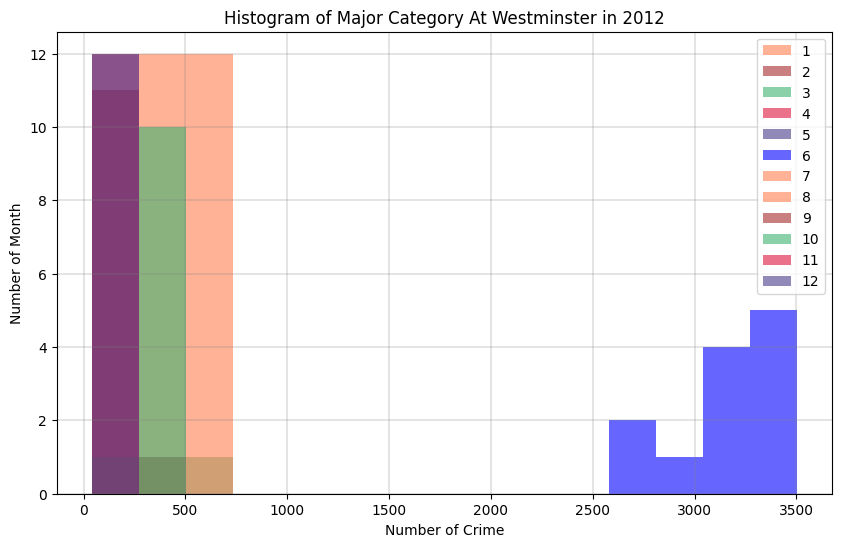

In [74]:
# membuat histogram
df_result.plot(kind='hist', figsize=(10, 6), 
               bins=15, 
               alpha=0.6,
               color=['coral','brown','mediumseagreen', 'crimson','darkslateblue','blue'])

plt.title('Histogram of Major Category At Westminster in 2012')
plt.ylabel('Number of Month')
plt.xlabel('Number of Crime')
plt.legend(labels=df_result.index)
plt.grid(linewidth=0.3, color="grey")
# menampilkan
plt.show()

### Kesimpulan:

    Terlihat dari data histogram di wilayah Westminster pada tahun 2012 , kejahatan Theft and Handling memiliki tingkat kejahatan yang tiggi lebih dari 35.000. Pada tingkat kedua terdapat Violence Against the Person dan tingkat ketiga adalah kejahatan Burglary.

### The Analysis
---

1. Berdasarkan data yang didapatkan dari area plot yang ditampilkan pada area plot bahwa dimunculkan 5 wilayah (borough) dengan kejahatan tertinggi dan diperkecil menjadi 3 wilayah tertinggi yaitu (1) Westminster, (2) Lambeth, (3) Southwark. Westminster menempati wilayah pertama dengan kejahatan tertinggi, berdasarkan perluasan data tersebut terlihat pada tahun 2012 sebagai puncak jumlah kejahatan yang tertinggi.
2. Berdasarkan data dari histogram ditunjukkan bahwa jenis kejahatan (major category) Theft and Handling di wilayah Westminster mencapai tingkat tertinggi dari kejahatan lainnya pada tahun 2012.
   
* Kesimpulan sementara: Wilayah Westminster memiliki kasus kejahatan terbanyak dari wilayah lain dan tahun 2012 memiliki data kasus kejahatan yang tinggi. Kemudian analisis lanjutan pada histogram bahwa pada tahun 2012 di wilayah Westminster, jenis kriminal Theft and Handling memiliki data kasus terbanyak.

### Next Analysis
---
Wilayah Westminster memiliki data kasus tertinggi dari wilayah lain dan tahun 2012 menunjukkan ata yang tinggi. Lalu kita akan melihat lebih jauh bentuk kejahatan dari Theft and Handling (major category) dan kode polisi (lsoa code) pada wilayah Westminster yang banyak muncul dengan jumlah data kasus yang tinggi. Oleh karea itu, kita akan mengetahui jumlah total (minor category) dari Theft and Handling pada tahun 2012-2016.

## Pie Chart
---

### Berapa persen dari bentuk kejahatan dari Theft and Handling (minor category) di wilayah Westminster tahun 2012-2016?

In [75]:
# membuat kolom minor category pada Theft and Handling di wilayah Westminster di tahun 2008-2016
theft=df_london[(df_london['major_category']== 'Theft and Handling') & (df_london['borough']== 'Westminster') & (df_london['year']>2011)] 
minor_ctgr= theft.groupby(['minor_category'])[['value']].agg('sum')
# menampilkan
minor_ctgr

,value
minor_category,
Handling Stolen Goods,406
Motor Vehicle Interference & Tampering,1376
Other Theft,75708
Other Theft Person,35445
Theft From Motor Vehicle,11889
Theft From Shops,20183
Theft/Taking Of Motor Vehicle,3967
Theft/Taking of Pedal Cycle,6690


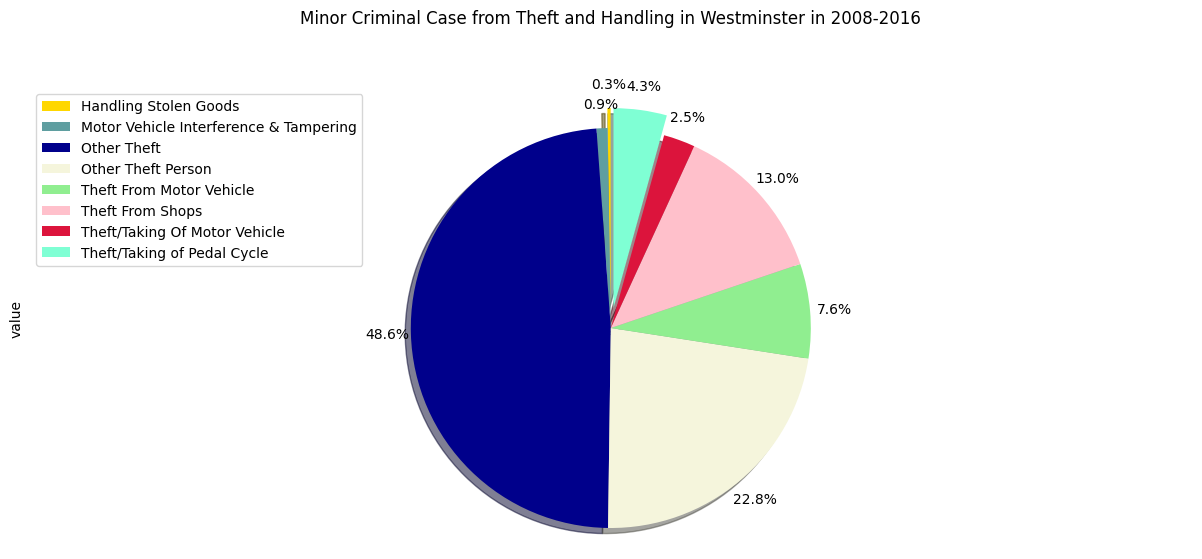

In [76]:
# memilih warna untuk masing-masing kategori kejahatan
colors_list = ['gold', 'cadetblue', 'darkblue',
               'beige', 'lightgreen', 'pink',
               'crimson', 'aquamarine']

# mengatur tampilan pie
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1]

minor_ctgr['value'].plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               labels=None,
               colors=colors_list,
               pctdistance=1.12,
               explode=explode_list)

# judul
plt.title('Minor Criminal Case from Theft and Handling in Westminster in 2008-2016', y=1.12)

plt.axis('equal')
plt.legend(labels=minor_ctgr.index, loc='upper left')
# menampilkan
plt.show()

### Kesimpulan:

    Pada tahun 2008-2016 dalam kejahatan Theft and Handling, salah satu bentuk pencurian yang diketahui dengan data 13.0% adalah Theft From Shops. Kemudian tingkat pertama adalah Other Theft sebesar 48.6% dan Other Theft Person sebesar 22.8%. Jadi pencurian di toko perlu diwaspadai dan paling penting pencurian lainnya (tidak diketahui jenisnya) hingga pencurian secara langsung dari seseorang perlu ditangkatkan kewaspadaan.

### Bar Chart
---


### Wilayah Westminster memiliki tingkat kejahatan tertinggi, lalu bagaimana dengan nomor kepolisian yang sering muncul pada wilayah tersebut tahun 2012-2016?

In [77]:
# menampilkan data di wilayah Westminster
westminster=df_london[(df_london['borough']=='Westminster') & (df_london['year']>2011)].sort_values(by="year")

# mengetahui jumlah kejadian kejahatan di Westminster berdasarkan wilayah kepolisisan
lsoa= westminster.groupby(['lsoa_code'])[['value']].agg('sum')

# Mengetahui 5 kode polisi di Westminster yang paling sering muncul
top_5_lsoa= lsoa.sort_values(
        by="value",
        ascending=False
        ).head(5)
# menampilkan
top_5_lsoa


,value
lsoa_code,
E01004734,26621
E01033595,25816
E01004763,21450
E01004736,16127
E01004735,11532


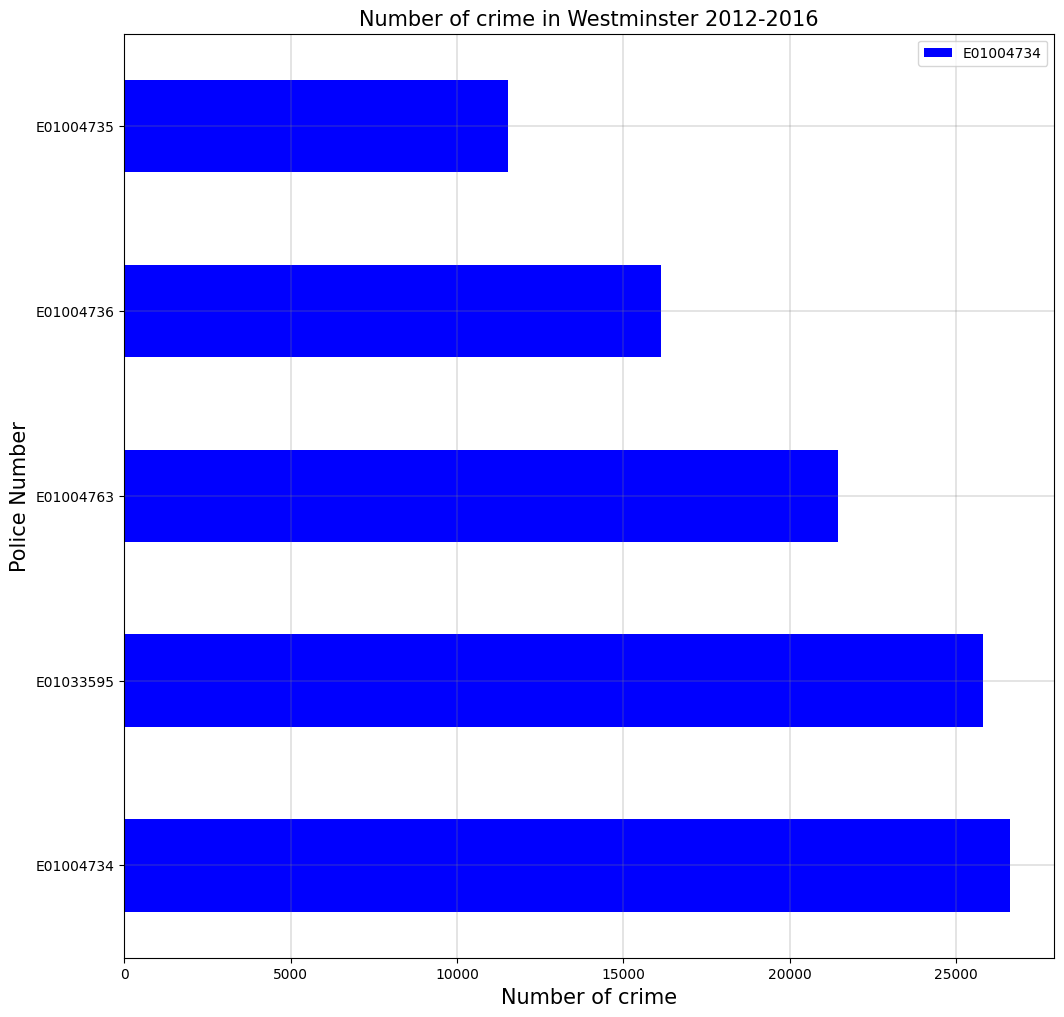

In [78]:
# membuat horizontal bar
top_5_lsoa.plot(kind='barh', figsize=(12,12),legend = False, color='blue', rot=0)

plt.xlabel("Number of crime", fontsize = 15)
plt.ylabel("Police Number", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels=top_5_lsoa.index, loc='upper right')
plt.grid(linewidth=0.3, color="grey")

# membuat dan mengatur ukuran judul
plt.title("Number of crime in Westminster 2012-2016", fontsize = 15)
# menampilkan
plt.show()

### Kesimpulan:

    Berdasarkan data di atas menunjukkan bahwa 3 nomor polisi yang sering muncul di wilayah Westminster tahun 2012-2016 adalah E01004734 di atas 27.000 kasus, E01033595 sekitar 26.000 kasus, E01004763 sekitar 22.000 kasus selama 4 tahun dari 2012 hingga 2016. Hasil data yang menunjukkan banyaknya laporan pada kode polisi (E01004734) yang muncul diperlukan untuk memperketat keamanan pada wilayah Westminster. 

### The Analysis
---

1. Berdasarkan data dari pie chart menunjukan bahwa dalam minor category pada Theft and Handling yaitu Other Theft menjadi kejadian yang paling banyak muncul selama 4 tahun 2012-2016. Disusul oleh Other Theft Person dan tingkat terakhir adalah Theft From Shop.
2. Dari data bar horizontal terlihat bahwa kode polisi di wilayah Westminster pada tahun 2012-2016 adalah (1) E01004734, (2) E01033595, (3) E01004763.
   
* Kesimpulan sementara: 
  
Beradasarkan data di atas menunjukkan bahwa seseorang mencuri barang tanpa diketahui jenisnya dan tempatnya banyak terjadi, disusul oleh pencurian langsung terhadap seseorang, dan terakhir perlu diwaspadai bahwa seseorang banyak mencuri dari toko. Kemudian banyaknya laporan tindak kejahatan dari nomor polisi E01004734 perlu ditingkatkan kewaspadaannya dengan memperbanyak cctv sebagai bukti untuk area-area public karena banyak pencurian yang tidak diketahui tempat dan jenisnya.

### Box Plot
---



### Terdapat tiga wilayah dengan kejahatan tertinggi yaitu Westminster, Lambeth, dan Southwark. Berapakah rata-rata dari kejahatan maksimum dari ketiga wilayah tersebut?

In [79]:
# mengahpus kolom yang tidak diperlukan
data2 = ["major_category","minor_category","month"]
top_3_crime = df_london.drop(data,axis=1)
# membuat set kolom index
top_3_crime = top_3_crime.set_index("year").groupby("borough").sum()
top_3_crime = top_3_crime.sort_values(by="value", ascending=False).head(3)
# menampilkan 
top_3_crime

C:\Users\udins\AppData\Local\Temp\ipykernel_24388\1278019071.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_3_crime = top_3_crime.set_index("year").groupby("borough").sum()


,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809


In [80]:
# membersihkan data yang tidak dibutuhkan dan membuat set kolom index
data_high = df_london.drop(data, axis=1).set_index("borough")

data_high = data_high.loc[top_3_crime.index]
data_high = pd.pivot_table(data_high, values="value", 
                         aggfunc=np.sum, index="year", 
                         columns="borough")


In [81]:
# menampilkan data statistik
data_high.describe()

borough,Lambeth,Southwark,Westminster
count,9.000000,9.000000,9.000000
mean,32464.222222,30978.777778,50558.666667
std,1014.515005,1215.293049,4201.683918
min,31225.000000,28912.000000,47395.000000
25%,31717.000000,30623.000000,47846.000000
50%,31868.000000,30737.000000,48330.000000
75%,33224.000000,31320.000000,53852.000000
max,34071.000000,33470.000000,59226.000000


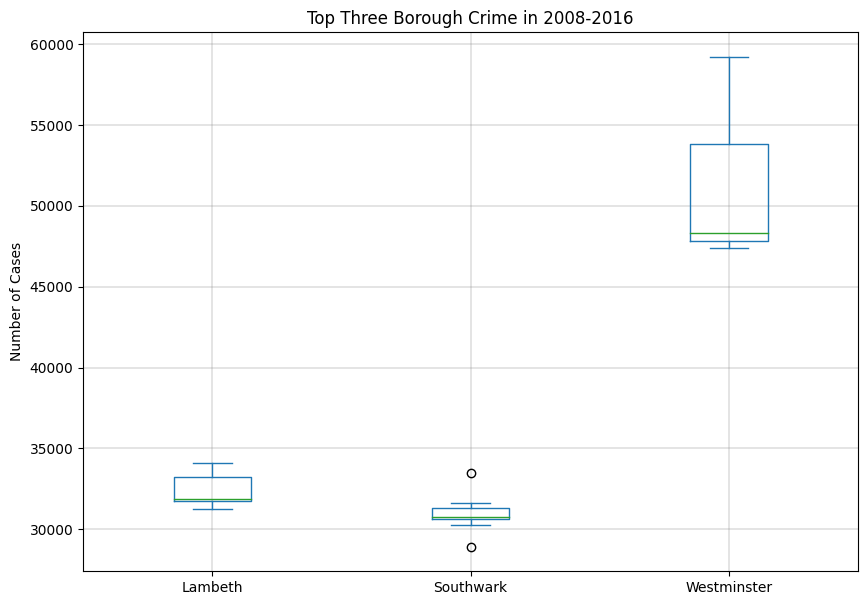

In [82]:
# membuat box plot
data_high.plot(kind='box', figsize=(10, 7))
plt.title('Top Three Borough Crime in 2008-2016')
plt.ylabel('Number of Cases')
plt.grid(linewidth=0.3, color="grey")

# menampilkan
plt.show()

### Kesimpulan

    Berdasarkan data di atas terlihat bahwa wilayah Westminster memiliki total kejahatan maksimum 59.226 dengan rata-rata kejahatannya sebanyak 50.558. Kemudian wilayah Lambeth kejahatan maksimumnya 34.071 dengan rata-rata 32.464. Wilayah Southwark sebanyak 33.470 dengan rata-ratanya 30.978.

## Scatter Plot

#### The scatter plot is a simple way to visualize the relationship between two variables.
---

Di sini kita akan membandingkan anatara dua variabel dengan kejahatan tertinggi untuk mengantisipasi kejadian di tahun berikutnya dengan melihat data pada bulan tertentu dengan tindak kriminalistas tertinggi tahun 2016.

### Bagaimana perkembangan yang terjadi di Kota Westminster untuk perbandingan dua kejahatan tertinggi lainnya yaitu Theft and Handling  dan Violence Against the Person pada tahun 2016?

In [83]:
# mengambul data untuk wilayah Westminster pada tahun 2016
hgh_lsoa=df_london[(df_london['borough']== 'Westminster') & (df_london['year']==2016)]

In [84]:
# membuat major category sebagai index dengan value dari setiap bulannya
data2 = hgh_lsoa.pivot_table(values='value',
                        index=['major_category'],
                        columns=['month'],
                        aggfunc=np.sum,
                        fill_value=0)
data2 = hgh_lsoa.pivot_table(values='value',
                        index=['major_category'],
                        columns=['month'],
                        aggfunc=np.sum,
                        fill_value=0)
# menampilkan
data2

month,1,2,3,4,5,6,7,8,9,10,11,12
major_category,,,,,,,,,,,,
Burglary,276,280,304,274,217,238,250,274,246,280,272,307
Criminal Damage,183,166,148,151,194,178,207,208,147,172,201,224
Drugs,138,152,150,221,168,152,165,282,173,158,166,124
Other Notifiable Offences,64,52,56,52,68,61,72,63,68,58,50,44
Robbery,165,108,159,125,150,149,129,183,167,132,134,221
Theft and Handling,2400,2235,2080,2121,2124,2098,2414,2297,2011,2313,2559,2868
Violence Against the Person,796,762,806,792,868,909,1120,984,961,980,893,963


In [85]:
# membuat dataframe sesuai kategori kejahatan pertama dan kedua tertinggi
data_theft= data2.loc['Theft and Handling'].transpose()

crime2= pd.DataFrame(data_theft)
crime2_scatter = crime2.reset_index()


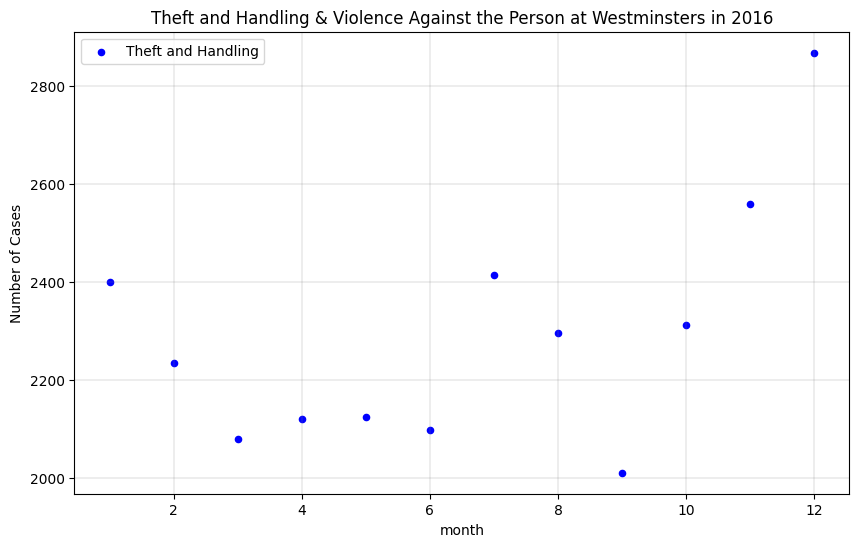

In [99]:
# membuat scatter plot
axis1 = crime2_scatter.plot(kind='scatter',
                         x='month',
                         y='Theft and Handling',
                         figsize=(10, 6),
                         color='blue',
                         label='Theft and Handling')


plt.title('Theft and Handling & Violence Against the Person at Westminsters in 2016')
plt.xlabel('month')
plt.ylabel('Number of Cases')
plt.grid(color="grey", linewidth=0.2)

# menampilkan
plt.show()

### Kesimpulan:

     Terlihat melalui hasil scatter plot bahwa perbandingan antara kejahatan Theft and Handling tahun 2016 pada bulan ke-12 mencapai titik tertinggi karena  pada bulan tersebut banyak liburan yang panjang dari natal hingga tahun baru sehingga banyak pencurian. Jika diambil garis lurus, hasil dari scatter plot menunjukkan bahwa garis akan menarik dari kiri bawah menuju kanan atas. Oleh karena itu tindak kriminalitas pencurian perlu diwaspadai pada bulan Desember dan tindakan kekerasan pada seseorang perlu diperketat penjagaan keamanannya pada bulan Juli.

  

## Words Cloud
---

In [87]:
# membuat tabel dengan borough set index dan year sebagai kolom
data_total = df_london.pivot_table(values='value',
                        index=['borough'],
                        columns=['year'],
                        aggfunc=np.sum,
                        fill_value=0)
# menambahkan total column
data_total['Total']= data_total.sum(axis=1)

data_total

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [88]:
# melihat total value
total_value= data_total['Total'].sum()
total_value

6447758

In [89]:
max_words = 90
word_string = ''
for borough in data_total.index.values:
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(data_total.loc[borough,'Total']/float(total_value)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)

word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

In [90]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='black').generate(word_string)

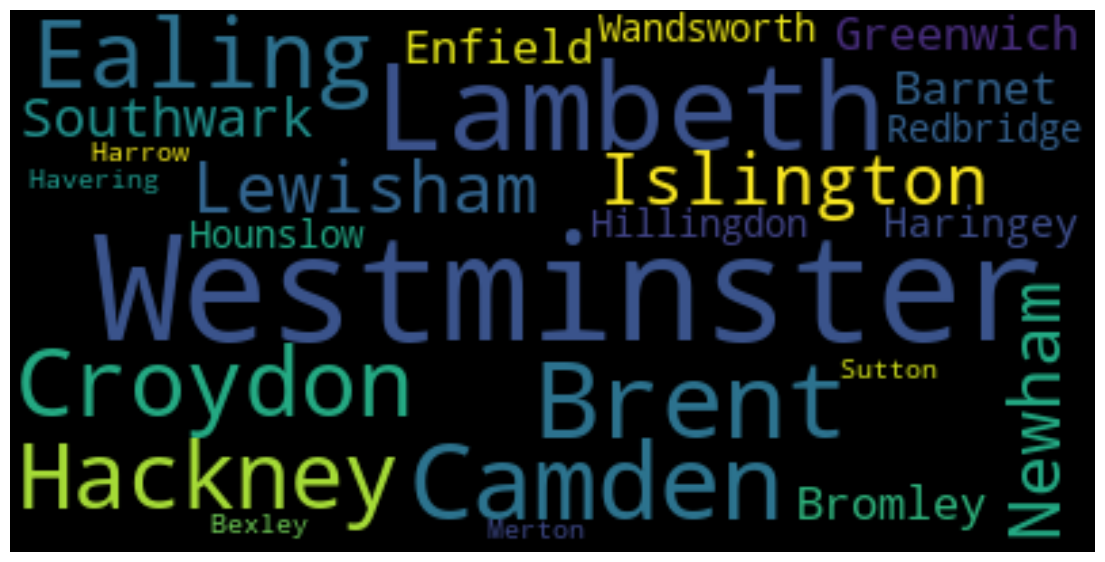

In [91]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualisasi Wilayah

In [92]:
# menampilkan ukuran
df_london.shape

(3419099, 7)

In [93]:
limit = 100
df_londoncrime2 = df_london.iloc[0:limit,:]

In [94]:
df_londoncrime2.shape

(100, 7)

In [95]:
# Latitude dan Longitude London
latitude_london= 51.509865
longitude_london= -0.118092

london_map= folium.Map(location=[latitude_london, longitude_london], zoom_start=12)
london_map

In [96]:
# memasukkan url untuk mengambil data
url_geo='https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'


In [97]:
data_geo = df_london[['borough','value']]
world_geo = url_geo

# membuat peta london yang secara umum
world_map = folium.Map(location=[latitude_london, longitude_london], zoom_start=12, tiles='OpenStreet Map')

# menghubungkan dengan choropleth dalam melihat data dari wilayah dan jumlah data kejahatan yang terjadi dari 2008-2016
world_map.choropleth(
    geo_data=world_geo,
    data=data_geo,
    columns=["borough","value"],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Menunjukkan warna Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime value in London Based From The Borough In 2008-2016',
    highlight=True,
)

# menampilkan
world_map

c:\Users\udins\AppData\Local\Programs\Python\Python310\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# Final Conclusion:

### Kasus kejahatan di atas dapat disimpulkan beberapa hal sebagai referensi dalam memperketat keamanan di London sebagai upaya menekan pertumbuhan kasus kejahatan, di antaranya:

1. Data yang dimunculkan pada area plot dari 5 wilayah teratas di London yang ditampilkan, terdapat 3 wilayah yang memiliki data kasus tertinggi adalah Westminster, Lambeth, Southwark.
   
2. Pada tahun 2012 merupakan data kejahatan dengan pelaporan kasus yang tinggi di wilayah Westminster. Data histogram yang diambil dari tahun 2012, menunjukkan jenis kejahatan Theft and Handling mimiliki data yang tinggi sebesar 38.152. Kejahatan kedua adalah Violence Against the Person sebesar 7.130 dan ketiga adalah Drugs sebesar 4.654.
   
3. Untuk menganalisis pada kejahatan Theft and Handling dalam minor category nya selama jangka waktu 4 tahun di wilayah Westminster menggunakan pie chart yaitu 2012-2016 menunjukkan bahwa Other Theft Person sebesar 48.6% dan Other Theft sebesar 22.8%. Tingkat ketiga adalah Theft From Shop sebesar 13.0%.
   
4. Melihat data dari kode polisi dari bar chart horizontal yang sering muncul selama 4 tahun terakhir (2012-2016) di wilayah Westminster menunjukkan bahwa pada kode polisi E01004734 memiliki banyak kasus pelaporan sebesar 27.000. Di bawahnya hanya selisih 1000 kasus yaitu 26.000 untuk kode polisi E01033595 dan kode polisi E01004763 sebesar 22.000.
   
5. Berdasarkan data dari Box plot dari 3 wilayah di London yaitu Westminster, Lambeth, Southwark dari tahun 2008-2016 wilayah Westminster memiliki rata-rata kejahatan tertinggi sebesar 50.558, sebesar 32.464 untuk Lambeth, dan 30.978 di wilayah Southwark.
   
6. Untuk lebih dalam melihat range pada bulan apa yang memiliki tingkat kejahatan tertinggi tahun 2016 di wilayah Westminster dengan scatter plot. Berdasarkan perbandingan tingkat kejahatan tertinggi yaitu Theft and Handling berada pada bulan Desember dan arah pposiitif dari titik-titik kiri bawah ke kanan atas.
   
7. Data dari visualisasi Words cloud menunjukkan bahwa kota Wesmister memiliki banyak kasus kejahatan yang diperlihatkan melalui kata yang paling besar muncul yaitu Westminster.
   
8. Dari visualisasi Folium terlihat bahwa bagian map yang berwarna merah menunjukkan banyaknya kriminalitas yang muncul pada kota-kota tersebut. Salah satu wilayah di London yang terlihat tulisannya besar dan terletak pada zona merah adalah City of Westminster.

* Suggestion:
  
    Secara keseluruhan terlihat bahwa wilayah Westminster memiiki tingkat kejahatan tertingi. Kategori jenis kejahatan tertinggi adalah Theft and Handling dengan sub kategori Other Theft dan Other Theft Person. Hal ini menunjukkan bahwa pencurian yang tidak diketahui tempat dan jenis barang banyak terjadi. Perlu diwaspadai juga pencurian dari toko karena berada pada tingkat ketiga. Bagi kode polisi E01004734 di wilayah Westminster diharapkan dapat memperketat pengamanan dengan pemasanagan CCTV di setiap sudut jalan area publik maupun gang kecil sebagai alat bantu pelacak untuk memperkuat bukti kejahatan dan mempercepat proses pengejaran pelaku kejahatan. Perlu diperhatikan, pada data di tahun 2016 bulan Desember memiliki banyak pelaporan kasus kejahatan Theft and Handling, sehingga penjaga keamanan pada area publik yang banyak dikunjungi saat liburan dapat lebih waspada dan banyak memberi himbauan.